In [228]:
%load_ext autoreload
%autoreload 2
import glob
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import glob
import seaborn as sns
sns.set(style='darkgrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
files = glob.glob('./tag_data_v2_curve_no_crf_all/*')

In [229]:
def extract_data(fname):
    with open(fname, 'r', encoding='utf-8') as f:
        s = f.read()
    
    RE_CONTENT = re.compile(r'\*\$.+\$\*')
    res = re.findall(RE_CONTENT, s)
    print(fname)
#     print(res)
    assert len(res) == 1
    
    res = res[0]
    res = res[2:-2]
    res = eval(res)
    return res

def show_final_res(res):
    p_list = res['p_list']
    acc_list = res['acc_list']
    f_list = res['f_list']
    r_list = res['r_list']
    best_dev_list = res['best_dev_list']
    mean_dev_info_list = res['dev_info_list']
    acc_curve = []
    p_curve = []
    r_curve = []
    f_curve = []
    
    for i in mean_dev_info_list:
        acc_curve.append(i['acc'])
        p_curve.append(i['p'])
        r_curve.append(i['r'])
        f_curve.append(i['f'])
        
    acc_curve = np.mean(np.array(acc_curve),axis=0)
    p_curve = np.mean(np.array(p_curve),axis=0)
    r_curve = np.mean(np.array(r_curve),axis=0)
    f_curve = np.mean(np.array(f_curve),axis=0)
    p_mean = np.mean(p_list)
    p_std = np.std(p_list)
    acc_mean = np.mean(acc_list)
    acc_std = np.std(acc_list)
    r_mean = np.mean(r_list)
    r_std = np.std(r_list)
    f_mean = np.mean(f_list)
    f_std = np.std(f_list)
    best_dev_mean = np.mean(best_dev_list)
    best_dev_std = np.std(best_dev_list)
    
    return acc_curve, p_curve, r_curve, f_curve, acc_mean, acc_std, p_mean, p_std, r_mean, r_std, f_mean, f_std, best_dev_mean, best_dev_std

def build_data_frame(files):
    df_dict = {}
    for i in files:
        temp = i.split('/')
        fname = temp[-1]
        df_dict[fname] = show_final_res(extract_data(i))
    
    return pd.DataFrame.from_dict(df_dict, orient='index', columns=['acc_curve', 'p_curve', 'r_curve', 'f_curve', 'acc_mean', 'acc_std', 'p_mean', 'p_std', 'r_mean', 'r_std', 'f_mean', 'f_std', 'best_dev_mean', 'best_dev_std'])
    
def merge_tries(expression, df):
    f_curves = []
    accs = []
    ps = []
    rs = []
    fs = []
    devs = []
    for i in range(3):
        f_curves.append(df['f_curve'][expression.format(i)])
        accs.append(df['acc_mean'][expression.format(i)])
        ps.append(df['p_mean'][expression.format(i)])
        rs.append(df['r_mean'][expression.format(i)])
        fs.append(df['f_mean'][expression.format(i)])
        devs.append(df['best_dev_mean'][expression.format(i)])
    return np.mean(f_curves, axis=0), np.mean(accs), np.mean(ps), np.mean(rs), np.mean(fs), np.mean(devs)
    
def build_data_frame_by_expr(df, exprs):
    
    df_dict = {}
    for i in exprs:
        df_dict[i] = merge_tries(i, df)
    
    
    fix_exprs = [
        'tag-out-no-embed-no-train',
        'tag-out-no-embed-train'
    ]
    
    for i in fix_exprs:
        df_dict[i] = (
            df['f_curve'][i],
            df['acc_mean'][i],
            df['p_mean'][i],
            df['r_mean'][i],
            df['f_mean'][i],
            df['best_dev_mean'][i])

        
    return pd.DataFrame.from_dict(df_dict, orient='index', columns=['f_curve', 'acc_mean', 'p_mean', 'r_mean', 'f_mean', 'best_dev_mean'])    

In [164]:
df = build_data_frame(files)

./tag_data_v2_curve_no_crf_all/tag-out-25-0
./tag_data_v2_curve_no_crf_all/tag-out-25-1
./tag_data_v2_curve_no_crf_all/tag-out-25-2
./tag_data_v2_curve_no_crf_all/tag-out-30-0
./tag_data_v2_curve_no_crf_all/tag-out-30-1
./tag_data_v2_curve_no_crf_all/tag-out-30-2
./tag_data_v2_curve_no_crf_all/tag-out-35-0
./tag_data_v2_curve_no_crf_all/tag-out-35-1
./tag_data_v2_curve_no_crf_all/tag-out-35-2
./tag_data_v2_curve_no_crf_all/tag-out-LSTM-0
./tag_data_v2_curve_no_crf_all/tag-out-LSTM-1
./tag_data_v2_curve_no_crf_all/tag-out-LSTM-2
./tag_data_v2_curve_no_crf_all/tag-out-gmm-10-0
./tag_data_v2_curve_no_crf_all/tag-out-gmm-10-1
./tag_data_v2_curve_no_crf_all/tag-out-gmm-10-2
./tag_data_v2_curve_no_crf_all/tag-out-gmm-25-fp-0
./tag_data_v2_curve_no_crf_all/tag-out-gmm-25-fp-1
./tag_data_v2_curve_no_crf_all/tag-out-gmm-25-fp-2
./tag_data_v2_curve_no_crf_all/tag-out-gmm-30-fp-0
./tag_data_v2_curve_no_crf_all/tag-out-gmm-30-fp-1
./tag_data_v2_curve_no_crf_all/tag-out-gmm-30-fp-2
./tag_data_v2_cu

In [166]:
exprs = [
    'tag-out-25-{}',
    'tag-out-30-{}',
    'tag-out-35-{}',
    'tag-out-LSTM-{}',
    'tag-out-gmm-8-{}',
    'tag-out-gmm-10-{}',
    'tag-out-gmm-25-fp-{}',
    'tag-out-gmm-30-fp-{}',
    'tag-out-gmm-35-fp-{}',
    'tag-out-token-{}-250',
]

df_2 = build_data_frame_by_expr(df ,exprs)

In [167]:
df_2

,f_curve,acc_mean,p_mean,r_mean,f_mean,best_dev_mean
tag-out-25-{},"[0.8525550506192618, 0.8904085556103915, 0.904...",0.985068,0.980698,0.983211,0.981952,0.988030
tag-out-30-{},"[0.8611309812381475, 0.8961309272384065, 0.906...",0.985270,0.979778,0.985090,0.982425,0.987536
tag-out-35-{},"[0.8586241169231306, 0.8958313673111366, 0.909...",0.985764,0.982061,0.984535,0.983295,0.986935
tag-out-LSTM-{},"[0.8219315856659204, 0.860837805240406, 0.8804...",0.980959,0.971577,0.976375,0.973968,0.976840
tag-out-gmm-8-{},"[0.8468414278787928, 0.8884385147457251, 0.901...",0.984877,0.979546,0.983958,0.981745,0.984734
tag-out-gmm-10-{},"[0.8463897238989656, 0.8867905008862408, 0.900...",0.983316,0.977390,0.981373,0.979376,0.985246
tag-out-gmm-25-fp-{},"[0.855457499699408, 0.8899636226425457, 0.9022...",0.985416,0.981223,0.983317,0.982268,0.987451
tag-out-gmm-30-fp-{},"[0.8560521258050077, 0.8924278898148872, 0.904...",0.984114,0.979004,0.982890,0.980941,0.986550
tag-out-gmm-35-fp-{},"[0.8577105386448745, 0.8952510411074122, 0.908...",0.984563,0.980424,0.983018,0.981719,0.987094
tag-out-token-{}-250,"[0.8479600262924839, 0.8843094648205024, 0.900...",0.984046,0.979535,0.981331,0.980430,0.986376


In [168]:
files

['./tag_data_v2_curve_no_crf_all/tag-out-25-0',
 './tag_data_v2_curve_no_crf_all/tag-out-25-1',
 './tag_data_v2_curve_no_crf_all/tag-out-25-2',
 './tag_data_v2_curve_no_crf_all/tag-out-30-0',
 './tag_data_v2_curve_no_crf_all/tag-out-30-1',
 './tag_data_v2_curve_no_crf_all/tag-out-30-2',
 './tag_data_v2_curve_no_crf_all/tag-out-35-0',
 './tag_data_v2_curve_no_crf_all/tag-out-35-1',
 './tag_data_v2_curve_no_crf_all/tag-out-35-2',
 './tag_data_v2_curve_no_crf_all/tag-out-LSTM-0',
 './tag_data_v2_curve_no_crf_all/tag-out-LSTM-1',
 './tag_data_v2_curve_no_crf_all/tag-out-LSTM-2',
 './tag_data_v2_curve_no_crf_all/tag-out-gmm-10-0',
 './tag_data_v2_curve_no_crf_all/tag-out-gmm-10-1',
 './tag_data_v2_curve_no_crf_all/tag-out-gmm-10-2',
 './tag_data_v2_curve_no_crf_all/tag-out-gmm-25-fp-0',
 './tag_data_v2_curve_no_crf_all/tag-out-gmm-25-fp-1',
 './tag_data_v2_curve_no_crf_all/tag-out-gmm-25-fp-2',
 './tag_data_v2_curve_no_crf_all/tag-out-gmm-30-fp-0',
 './tag_data_v2_curve_no_crf_all/tag-out-g

In [169]:
df_2

,f_curve,acc_mean,p_mean,r_mean,f_mean,best_dev_mean
tag-out-25-{},"[0.8525550506192618, 0.8904085556103915, 0.904...",0.985068,0.980698,0.983211,0.981952,0.988030
tag-out-30-{},"[0.8611309812381475, 0.8961309272384065, 0.906...",0.985270,0.979778,0.985090,0.982425,0.987536
tag-out-35-{},"[0.8586241169231306, 0.8958313673111366, 0.909...",0.985764,0.982061,0.984535,0.983295,0.986935
tag-out-LSTM-{},"[0.8219315856659204, 0.860837805240406, 0.8804...",0.980959,0.971577,0.976375,0.973968,0.976840
tag-out-gmm-8-{},"[0.8468414278787928, 0.8884385147457251, 0.901...",0.984877,0.979546,0.983958,0.981745,0.984734
tag-out-gmm-10-{},"[0.8463897238989656, 0.8867905008862408, 0.900...",0.983316,0.977390,0.981373,0.979376,0.985246
tag-out-gmm-25-fp-{},"[0.855457499699408, 0.8899636226425457, 0.9022...",0.985416,0.981223,0.983317,0.982268,0.987451
tag-out-gmm-30-fp-{},"[0.8560521258050077, 0.8924278898148872, 0.904...",0.984114,0.979004,0.982890,0.980941,0.986550
tag-out-gmm-35-fp-{},"[0.8577105386448745, 0.8952510411074122, 0.908...",0.984563,0.980424,0.983018,0.981719,0.987094
tag-out-token-{}-250,"[0.8479600262924839, 0.8843094648205024, 0.900...",0.984046,0.979535,0.981331,0.980430,0.986376


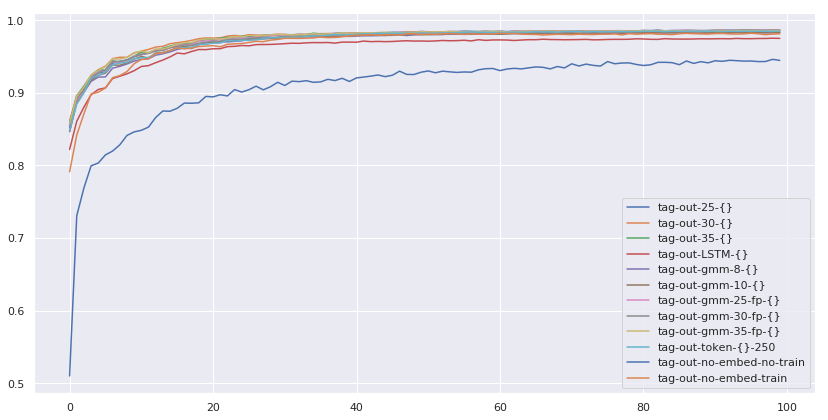

In [170]:
fig = plt.figure(0)
fig.set_figheight(7)
fig.set_figwidth(14)
for i in df_2['f_curve'].keys():
    plt.plot(df_2['f_curve'][i], label=i)
    plt.legend()

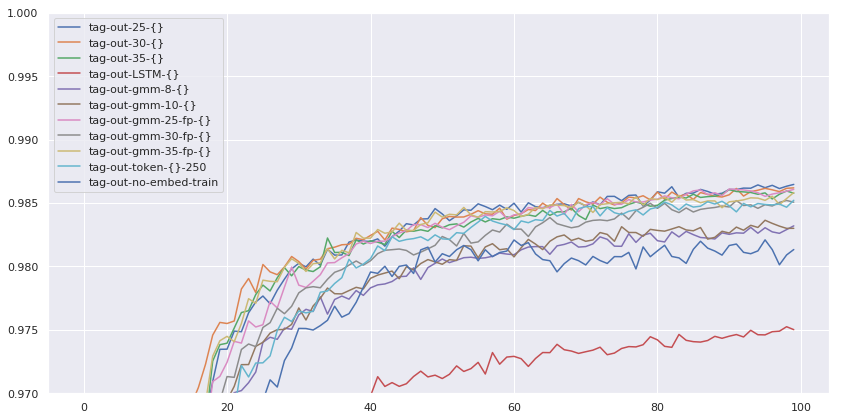

In [171]:
fig = plt.figure(0)
fig.set_figheight(7)
fig.set_figwidth(14)
for i in df_2['f_curve'].keys():
    if i == 'tag-out-no-embed-no-train':
        continue
    plt.plot(df_2['f_curve'][i], label=i)
    plt.legend()
    plt.ylim(0.97,1)

In [172]:
files = glob.glob('./tag_data_medium_curve_no_crf_all/*')

In [173]:
df = build_data_frame(files)

./tag_data_medium_curve_no_crf_all/tag-out-LSTM-0
./tag_data_medium_curve_no_crf_all/tag-out-LSTM-1
./tag_data_medium_curve_no_crf_all/tag-out-LSTM-2
./tag_data_medium_curve_no_crf_all/tag-out-gmm-15-0
./tag_data_medium_curve_no_crf_all/tag-out-gmm-15-1
./tag_data_medium_curve_no_crf_all/tag-out-gmm-15-2
./tag_data_medium_curve_no_crf_all/tag-out-gmm-20-0
./tag_data_medium_curve_no_crf_all/tag-out-gmm-20-1
./tag_data_medium_curve_no_crf_all/tag-out-gmm-20-2
./tag_data_medium_curve_no_crf_all/tag-out-medium-30-0
./tag_data_medium_curve_no_crf_all/tag-out-medium-30-1
./tag_data_medium_curve_no_crf_all/tag-out-medium-30-2
./tag_data_medium_curve_no_crf_all/tag-out-medium-35-0
./tag_data_medium_curve_no_crf_all/tag-out-medium-35-1
./tag_data_medium_curve_no_crf_all/tag-out-medium-35-2
./tag_data_medium_curve_no_crf_all/tag-out-medium-40-0
./tag_data_medium_curve_no_crf_all/tag-out-medium-40-1
./tag_data_medium_curve_no_crf_all/tag-out-medium-40-2
./tag_data_medium_curve_no_crf_all/tag-out-

In [174]:
exprs = [
    'tag-out-medium-40-{}',
    'tag-out-medium-30-{}',
    'tag-out-medium-35-{}',
    'tag-out-LSTM-{}',
    'tag-out-gmm-20-{}',
    'tag-out-gmm-15-{}',
    'tag-out-token-{}-360',
]
build_data_frame_by_expr(df, exprs)

,f_curve,acc_mean,p_mean,r_mean,f_mean,best_dev_mean
tag-out-medium-40-{},"[0.8517141858132553, 0.8901754629915408, 0.911...",0.986471,0.982390,0.984108,0.983246,0.987280
tag-out-medium-30-{},"[0.848460313502574, 0.8910022911327302, 0.9071...",0.986965,0.982475,0.985432,0.983950,0.987246
tag-out-medium-35-{},"[0.8452312642312331, 0.8919812768923151, 0.904...",0.986090,0.981498,0.984706,0.983099,0.987679
tag-out-LSTM-{},"[0.8370437352787627, 0.8754390324453624, 0.896...",0.984821,0.978686,0.982655,0.980665,0.984514
tag-out-gmm-20-{},"[0.8479364997219069, 0.8845988992026671, 0.903...",0.986370,0.981570,0.984001,0.982783,0.987523
tag-out-gmm-15-{},"[0.8483593359006308, 0.8824072216986042, 0.902...",0.986067,0.982147,0.982292,0.982218,0.987344
tag-out-token-{}-360,"[0.8504825877087714, 0.8838289921526998, 0.906...",0.987246,0.983142,0.985282,0.984210,0.988064
tag-out-no-embed-no-train,"[0.5098349170557013, 0.7307119070732895, 0.769...",0.960054,0.957275,0.946876,0.952030,0.949306
tag-out-no-embed-train,"[0.7912434863745045, 0.8418931530348013, 0.871...",0.984237,0.979148,0.980775,0.979960,0.983520


In [175]:
files = glob.glob('./tag_data_test_augment/*')

In [176]:
df = build_data_frame(files)

./tag_data_test_augment/tag-out-25-0
./tag_data_test_augment/tag-out-25-1
./tag_data_test_augment/tag-out-25-2
./tag_data_test_augment/tag-out-30-0
./tag_data_test_augment/tag-out-30-1
./tag_data_test_augment/tag-out-30-2
./tag_data_test_augment/tag-out-35-0
./tag_data_test_augment/tag-out-35-1
./tag_data_test_augment/tag-out-35-2
./tag_data_test_augment/tag-out-LSTM-0
./tag_data_test_augment/tag-out-LSTM-1
./tag_data_test_augment/tag-out-LSTM-2
./tag_data_test_augment/tag-out-gmm-10-0
./tag_data_test_augment/tag-out-gmm-10-1
./tag_data_test_augment/tag-out-gmm-10-2
./tag_data_test_augment/tag-out-gmm-25-fp-0
./tag_data_test_augment/tag-out-gmm-25-fp-1
./tag_data_test_augment/tag-out-gmm-25-fp-2
./tag_data_test_augment/tag-out-gmm-30-fp-0
./tag_data_test_augment/tag-out-gmm-30-fp-1
./tag_data_test_augment/tag-out-gmm-30-fp-2
./tag_data_test_augment/tag-out-gmm-35-fp-0
./tag_data_test_augment/tag-out-gmm-35-fp-1
./tag_data_test_augment/tag-out-gmm-35-fp-2
./tag_data_test_augment/tag-out

In [207]:
files = glob.glob('./tag_data_test_augment_female/*')

In [208]:
df = build_data_frame(files)

./tag_data_test_augment_female/tag-out-LSTM-0
./tag_data_test_augment_female/tag-out-LSTM-1
./tag_data_test_augment_female/tag-out-LSTM-2
./tag_data_test_augment_female/tag-out-female-20-0
./tag_data_test_augment_female/tag-out-female-20-1
./tag_data_test_augment_female/tag-out-female-20-2
./tag_data_test_augment_female/tag-out-female-25-0
./tag_data_test_augment_female/tag-out-female-25-1
./tag_data_test_augment_female/tag-out-female-25-2
./tag_data_test_augment_female/tag-out-female-30-0
./tag_data_test_augment_female/tag-out-female-30-1
./tag_data_test_augment_female/tag-out-female-30-2
./tag_data_test_augment_female/tag-out-female-35-0
./tag_data_test_augment_female/tag-out-female-35-1
./tag_data_test_augment_female/tag-out-female-35-2
./tag_data_test_augment_female/tag-out-female-40-0
./tag_data_test_augment_female/tag-out-female-40-1
./tag_data_test_augment_female/tag-out-female-40-2
./tag_data_test_augment_female/tag-out-token-0-250
./tag_data_test_augment_female/tag-out-token-1

In [209]:
exprs = [
    'tag-out-som-10-{}',        
    'tag-out-som-15-{}',        
    'tag-out-female-20-{}',
    'tag-out-female-25-{}',
    'tag-out-female-40-{}',
    'tag-out-female-30-{}',
    'tag-out-female-35-{}',        
    'tag-out-LSTM-{}',
    'tag-out-gmm-10-rd-{}',
    'tag-out-gmm-15-{}',
    'tag-out-gmm-20-{}',
    'tag-out-gmm-25-{}',
    'tag-out-gmm-30-{}',
    'tag-out-gmm-35-rd-{}',
    'tag-out-gmm-40-rd-{}',
    'tag-out-gmm-10-fp-{}',
    'tag-out-gmm-15-fp-{}',
    'tag-out-gmm-20-fp-{}',
    'tag-out-gmm-25-fp-{}',
    'tag-out-gmm-30-fp-{}',
    'tag-out-gmm-35-fp-{}',
    'tag-out-gmm-40-fp-{}',
    'tag-out-gmm-10-km-{}',
    'tag-out-gmm-15-km-{}',
    'tag-out-gmm-20-km-{}',
    'tag-out-gmm-25-km-{}',
    'tag-out-gmm-30-km-{}',
    'tag-out-gmm-35-km-{}',
    'tag-out-gmm-40-km-{}',
    'tag-out-token-{}-250',
    'tag-out-token-{}-300',
]
build_data_frame_by_expr(df,exprs)

,f_curve,acc_mean,p_mean,r_mean,f_mean,best_dev_mean
tag-out-som-10-{},"[0.8428683691668676, 0.87896016493741, 0.89592...",0.969887,0.959949,0.961290,0.960602,0.986361
tag-out-som-15-{},"[0.8483311707878206, 0.879517951832339, 0.8963...",0.976471,0.964173,0.973863,0.968989,0.987669
tag-out-female-20-{},"[0.8432019134352903, 0.878576996067627, 0.8939...",0.976728,0.968026,0.972546,0.970276,0.986581
tag-out-female-25-{},"[0.8506946269083736, 0.8861466886248947, 0.895...",0.972515,0.958520,0.969245,0.963839,0.986256
tag-out-female-40-{},"[0.8480173234339157, 0.8868177963902104, 0.896...",0.971492,0.962352,0.967871,0.965056,0.987704
tag-out-female-30-{},"[0.8562091380710696, 0.8912620788290454, 0.903...",0.972825,0.960194,0.970581,0.965346,0.986910
tag-out-female-35-{},"[0.856703325933117, 0.8881885669477803, 0.8989...",0.971383,0.960819,0.968257,0.964492,0.988101
tag-out-LSTM-{},"[0.8147927794710617, 0.851691828973873, 0.8732...",0.960103,0.938481,0.963229,0.950553,0.975035
tag-out-gmm-10-rd-{},"[0.8492648696247768, 0.8814027252508626, 0.895...",0.966263,0.950507,0.960024,0.955199,0.985055
tag-out-gmm-15-{},"[0.8501315206786136, 0.881193982942217, 0.8989...",0.964753,0.947777,0.955749,0.951736,0.985675


In [210]:
files = glob.glob('./tag_data_alldomain_2/tag-out-*')

In [211]:
files

['./tag_data_alldomain_2/tag-out-LSTM-0',
 './tag_data_alldomain_2/tag-out-LSTM-1',
 './tag_data_alldomain_2/tag-out-LSTM-2',
 './tag_data_alldomain_2/tag-out-gmm-20-fp-0',
 './tag_data_alldomain_2/tag-out-gmm-20-fp-1',
 './tag_data_alldomain_2/tag-out-gmm-20-fp-2',
 './tag_data_alldomain_2/tag-out-gmm-20-rd-0',
 './tag_data_alldomain_2/tag-out-gmm-20-rd-1',
 './tag_data_alldomain_2/tag-out-gmm-20-rd-2',
 './tag_data_alldomain_2/tag-out-gmm-30-fp-0',
 './tag_data_alldomain_2/tag-out-gmm-30-fp-1',
 './tag_data_alldomain_2/tag-out-gmm-30-fp-2',
 './tag_data_alldomain_2/tag-out-gmm-30-rd-0',
 './tag_data_alldomain_2/tag-out-gmm-30-rd-1',
 './tag_data_alldomain_2/tag-out-gmm-30-rd-2',
 './tag_data_alldomain_2/tag-out-gmm-40-fp-0',
 './tag_data_alldomain_2/tag-out-gmm-40-fp-1',
 './tag_data_alldomain_2/tag-out-gmm-40-fp-2',
 './tag_data_alldomain_2/tag-out-gmm-40-rd-0',
 './tag_data_alldomain_2/tag-out-gmm-40-rd-1',
 './tag_data_alldomain_2/tag-out-gmm-40-rd-2',
 './tag_data_alldomain_2/tag

In [212]:
exprs = [
    'tag-out-som-20-{}',        
    'tag-out-som-30-{}',        
    'tag-out-som-40-{}',        
    'tag-out-som-50-{}',        
    'tag-out-som-60-{}',             
    'tag-out-LSTM-{}',
    'tag-out-gmm-20-rd-{}',
    'tag-out-gmm-30-rd-{}',
    'tag-out-gmm-40-rd-{}',
    'tag-out-gmm-50-rd-{}',
    'tag-out-gmm-60-rd-{}',
    'tag-out-gmm-20-fp-{}',
    'tag-out-gmm-30-fp-{}',
    'tag-out-gmm-40-fp-{}',
    'tag-out-gmm-50-fp-{}',
    'tag-out-gmm-60-fp-{}',
    'tag-out-token-{}-600',
]
df = build_data_frame(files)

./tag_data_alldomain_2/tag-out-LSTM-0
./tag_data_alldomain_2/tag-out-LSTM-1
./tag_data_alldomain_2/tag-out-LSTM-2
./tag_data_alldomain_2/tag-out-gmm-20-fp-0
./tag_data_alldomain_2/tag-out-gmm-20-fp-1
./tag_data_alldomain_2/tag-out-gmm-20-fp-2
./tag_data_alldomain_2/tag-out-gmm-20-rd-0
./tag_data_alldomain_2/tag-out-gmm-20-rd-1
./tag_data_alldomain_2/tag-out-gmm-20-rd-2
./tag_data_alldomain_2/tag-out-gmm-30-fp-0
./tag_data_alldomain_2/tag-out-gmm-30-fp-1
./tag_data_alldomain_2/tag-out-gmm-30-fp-2
./tag_data_alldomain_2/tag-out-gmm-30-rd-0
./tag_data_alldomain_2/tag-out-gmm-30-rd-1
./tag_data_alldomain_2/tag-out-gmm-30-rd-2
./tag_data_alldomain_2/tag-out-gmm-40-fp-0
./tag_data_alldomain_2/tag-out-gmm-40-fp-1
./tag_data_alldomain_2/tag-out-gmm-40-fp-2
./tag_data_alldomain_2/tag-out-gmm-40-rd-0
./tag_data_alldomain_2/tag-out-gmm-40-rd-1
./tag_data_alldomain_2/tag-out-gmm-40-rd-2
./tag_data_alldomain_2/tag-out-gmm-50-fp-0
./tag_data_alldomain_2/tag-out-gmm-50-fp-1
./tag_data_alldomain_2/tag

In [213]:
build_data_frame_by_expr(df,exprs)

,f_curve,acc_mean,p_mean,r_mean,f_mean,best_dev_mean
tag-out-som-20-{},"[0.8781165141688002, 0.8958093396483142, 0.905...",0.958869,0.933050,0.941789,0.937396,0.929083
tag-out-som-30-{},"[0.8753277837933172, 0.8942598499975768, 0.904...",0.958972,0.936048,0.940265,0.938144,0.929538
tag-out-som-40-{},"[0.8738538058872424, 0.8967101008519963, 0.906...",0.958673,0.933524,0.941669,0.937574,0.931793
tag-out-som-50-{},"[0.8771964113267482, 0.8952768695540595, 0.902...",0.958100,0.932788,0.940450,0.936599,0.928830
tag-out-som-60-{},"[0.8754100748635324, 0.8965157471770908, 0.905...",0.956596,0.931773,0.936543,0.934149,0.930982
tag-out-LSTM-{},"[0.8712315378647956, 0.8919131904651011, 0.899...",0.957461,0.931735,0.937338,0.934522,0.926156
tag-out-gmm-20-rd-{},"[0.8727027459232577, 0.8918244975462494, 0.902...",0.958862,0.934195,0.940787,0.937476,0.928442
tag-out-gmm-30-rd-{},"[0.8730544251119743, 0.8948645252599472, 0.903...",0.958793,0.935202,0.938942,0.937067,0.928873
tag-out-gmm-40-rd-{},"[0.8761010770873398, 0.8956648553665693, 0.903...",0.959254,0.934981,0.940907,0.937930,0.930636
tag-out-gmm-50-rd-{},"[0.8739079359272611, 0.8934355611987232, 0.902...",0.958450,0.933901,0.939624,0.936750,0.929016


In [232]:
files = glob.glob('./tag_data_bug/tag-out-*')

In [233]:
exprs = [
    'tag-out-som-20-{}',        
    'tag-out-som-25-{}',        
    'tag-out-som-30-{}',        
    'tag-out-som-35-{}',        
    'tag-out-som-40-{}',
    'tag-out-som-45-{}',             
    'tag-out-som-50-{}', 
    'tag-out-gmm-20-rd-{}',        
    'tag-out-gmm-25-rd-{}', 
    'tag-out-gmm-30-rd-{}', 
    'tag-out-gmm-35-rd-{}', 
    'tag-out-gmm-40-rd-{}', 
    'tag-out-gmm-45-rd-{}', 
    'tag-out-gmm-50-rd-{}', 
    'tag-out-gmm-20-km-{}',        
    'tag-out-gmm-25-km-{}', 
    'tag-out-gmm-30-km-{}', 
    'tag-out-gmm-35-km-{}', 
    'tag-out-gmm-40-km-{}', 
    'tag-out-gmm-45-km-{}', 
    'tag-out-gmm-50-km-{}', 
    'tag-out-gmm-20-fp-{}',        
    'tag-out-gmm-25-fp-{}', 
    'tag-out-gmm-30-fp-{}', 
    'tag-out-gmm-35-fp-{}', 
    'tag-out-gmm-40-fp-{}', 
    'tag-out-gmm-45-fp-{}', 
    'tag-out-gmm-50-fp-{}',    
    'tag-out-LSTM-{}',
    'tag-out-token-{}-600',
    'tag-out-token-{}-550',
]
df = build_data_frame(files)

./tag_data_bug/tag-out-LSTM-0
./tag_data_bug/tag-out-LSTM-1
./tag_data_bug/tag-out-LSTM-2
./tag_data_bug/tag-out-gmm-20-fp-0
./tag_data_bug/tag-out-gmm-20-fp-1
./tag_data_bug/tag-out-gmm-20-fp-2
./tag_data_bug/tag-out-gmm-20-km-0
./tag_data_bug/tag-out-gmm-20-km-1
./tag_data_bug/tag-out-gmm-20-km-2
./tag_data_bug/tag-out-gmm-20-rd-0
./tag_data_bug/tag-out-gmm-20-rd-1
./tag_data_bug/tag-out-gmm-20-rd-2
./tag_data_bug/tag-out-gmm-25-fp-0
./tag_data_bug/tag-out-gmm-25-fp-1
./tag_data_bug/tag-out-gmm-25-fp-2
./tag_data_bug/tag-out-gmm-25-km-0
./tag_data_bug/tag-out-gmm-25-km-1
./tag_data_bug/tag-out-gmm-25-km-2
./tag_data_bug/tag-out-gmm-25-rd-0
./tag_data_bug/tag-out-gmm-25-rd-1
./tag_data_bug/tag-out-gmm-25-rd-2
./tag_data_bug/tag-out-gmm-30-fp-0
./tag_data_bug/tag-out-gmm-30-fp-1
./tag_data_bug/tag-out-gmm-30-fp-2
./tag_data_bug/tag-out-gmm-30-km-0
./tag_data_bug/tag-out-gmm-30-km-1
./tag_data_bug/tag-out-gmm-30-km-2
./tag_data_bug/tag-out-gmm-30-rd-0
./tag_data_bug/tag-out-gmm-30-rd-1


In [234]:
build_data_frame_by_expr(df,exprs)

,f_curve,acc_mean,p_mean,r_mean,f_mean,best_dev_mean
tag-out-som-20-{},"[0.6702081164515468, 0.7505929988154992, 0.799...",0.970873,0.912950,0.901949,0.907414,0.905334
tag-out-som-25-{},"[0.6813514543727983, 0.7512776323730551, 0.792...",0.971311,0.913545,0.903401,0.908443,0.903563
tag-out-som-30-{},"[0.6658393877382264, 0.7509106403965534, 0.789...",0.969793,0.910669,0.896895,0.903725,0.902251
tag-out-som-35-{},"[0.6825834972228696, 0.7598803924200824, 0.794...",0.970949,0.912800,0.902288,0.907512,0.902658
tag-out-som-40-{},"[0.682240698054334, 0.7537850357145466, 0.7944...",0.970628,0.913702,0.900571,0.907085,0.902071
tag-out-som-45-{},"[0.6831705550371322, 0.7467666204671657, 0.790...",0.970616,0.912334,0.900982,0.906617,0.902049
tag-out-som-50-{},"[0.67384473235668, 0.7495053922919168, 0.78897...",0.970926,0.913903,0.901611,0.907712,0.900836
tag-out-gmm-20-rd-{},"[0.6716281252474468, 0.7429886765625545, 0.793...",0.970745,0.912007,0.903159,0.907559,0.903894
tag-out-gmm-25-rd-{},"[0.66676353405377, 0.7458404446525231, 0.79322...",0.970540,0.912394,0.900861,0.906585,0.899810
tag-out-gmm-30-rd-{},"[0.6469087871584436, 0.7404561455989443, 0.792...",0.970809,0.911907,0.902578,0.907218,0.905086


In [235]:
files = glob.glob('./tag_data_bugsmall/tag-out-*')

In [236]:
exprs = [
    'tag-out-som-10-{}',        
    'tag-out-som-15-{}',  
    'tag-out-som-20-{}',        
    'tag-out-som-25-{}',        
    'tag-out-som-30-{}',        
    'tag-out-som-35-{}',        
    'tag-out-gmm-10-rd-{}', 
    'tag-out-gmm-15-rd-{}', 
    'tag-out-gmm-20-rd-{}',        
    'tag-out-gmm-25-rd-{}', 
    'tag-out-gmm-30-rd-{}', 
    'tag-out-gmm-35-rd-{}', 
    'tag-out-gmm-10-km-{}',        
    'tag-out-gmm-15-km-{}',        
    'tag-out-gmm-20-km-{}',        
    'tag-out-gmm-25-km-{}', 
    'tag-out-gmm-30-km-{}', 
    'tag-out-gmm-35-km-{}', 
    'tag-out-gmm-10-fp-{}',        
    'tag-out-gmm-15-fp-{}',        
    'tag-out-gmm-20-fp-{}',        
    'tag-out-gmm-25-fp-{}', 
    'tag-out-gmm-30-fp-{}', 
    'tag-out-gmm-35-fp-{}', 
    'tag-out-LSTM-{}',
    'tag-out-token-{}-400',
]
df = build_data_frame(files)

./tag_data_bugsmall/tag-out-LSTM-0
./tag_data_bugsmall/tag-out-LSTM-1
./tag_data_bugsmall/tag-out-LSTM-2
./tag_data_bugsmall/tag-out-gmm-10-fp-0
./tag_data_bugsmall/tag-out-gmm-10-fp-1
./tag_data_bugsmall/tag-out-gmm-10-fp-2
./tag_data_bugsmall/tag-out-gmm-10-km-0
./tag_data_bugsmall/tag-out-gmm-10-km-1
./tag_data_bugsmall/tag-out-gmm-10-km-2
./tag_data_bugsmall/tag-out-gmm-10-rd-0
./tag_data_bugsmall/tag-out-gmm-10-rd-1
./tag_data_bugsmall/tag-out-gmm-10-rd-2
./tag_data_bugsmall/tag-out-gmm-15-fp-0
./tag_data_bugsmall/tag-out-gmm-15-fp-1
./tag_data_bugsmall/tag-out-gmm-15-fp-2
./tag_data_bugsmall/tag-out-gmm-15-km-0
./tag_data_bugsmall/tag-out-gmm-15-km-1
./tag_data_bugsmall/tag-out-gmm-15-km-2
./tag_data_bugsmall/tag-out-gmm-15-rd-0
./tag_data_bugsmall/tag-out-gmm-15-rd-1
./tag_data_bugsmall/tag-out-gmm-15-rd-2
./tag_data_bugsmall/tag-out-gmm-20-fp-0
./tag_data_bugsmall/tag-out-gmm-20-fp-1
./tag_data_bugsmall/tag-out-gmm-20-fp-2
./tag_data_bugsmall/tag-out-gmm-20-km-0
./tag_data_bugs

In [237]:
build_data_frame_by_expr(df,exprs)

,f_curve,acc_mean,p_mean,r_mean,f_mean,best_dev_mean
tag-out-som-10-{},"[0.5804332158948351, 0.6887886167482354, 0.756...",0.967948,0.910405,0.886954,0.898525,0.893523
tag-out-som-15-{},"[0.5917633632789047, 0.6383994480849656, 0.751...",0.967078,0.906247,0.885067,0.895530,0.893121
tag-out-som-20-{},"[0.6001033794283034, 0.6826138632127058, 0.753...",0.968216,0.911106,0.888865,0.899841,0.893426
tag-out-som-25-{},"[0.5805155294646788, 0.7005151642045089, 0.755...",0.967796,0.908776,0.888260,0.898398,0.892253
tag-out-som-30-{},"[0.6044554350553869, 0.6962996197379917, 0.750...",0.967025,0.908869,0.883254,0.895876,0.892615
tag-out-som-35-{},"[0.6120966027386311, 0.6950641779776103, 0.753...",0.967796,0.911277,0.887220,0.899082,0.893598
tag-out-gmm-10-rd-{},"[0.5866223658602968, 0.6981982577846889, 0.747...",0.966675,0.904296,0.884124,0.894094,0.887979
tag-out-gmm-15-rd-{},"[0.6047457720152464, 0.684120452588853, 0.7544...",0.968135,0.911415,0.887583,0.899340,0.896338
tag-out-gmm-20-rd-{},"[0.6201353867858354, 0.7003519361465506, 0.750...",0.967854,0.912782,0.885624,0.898994,0.895869
tag-out-gmm-25-rd-{},"[0.6160237381356054, 0.7049661254496771, 0.757...",0.968152,0.910036,0.888986,0.899381,0.893366
